**Experiment - 5**

***Group - 25***

*Kuppala Navya - 2022H1400125H*

*Saloni Sharma - 2022H1400121H*

***Multi-class classification.***

Data points belonging to 4 classes are generated with 30 sample points for each class.
Build classifiers using Logistic Regression (One VS Rest) and Softmax algorithms to classify the generated data.

The code given below will generate the 120 data points.

***Expected Output:***

Provide the confusion matrix and classification accuracy for each of the algorithms.
Plot the decision boundaries along with the data points.


# **Data Creation and Visualization**

In [1]:
#Import the necessary modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier

   Feature-1  Feature-2  Target
0  -4.019373  -4.865132       0
1  -4.188254  -4.134534       0
2  -3.312226   4.347394       2
3   4.878362  -5.276293       1
4   5.708186  -4.692576       1


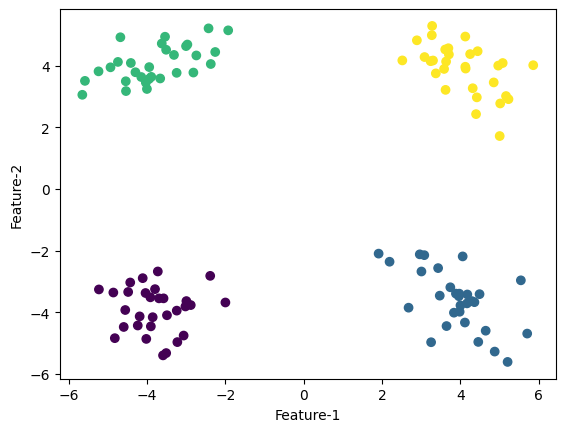

In [2]:
#Generate the data
data = make_classification(n_samples=120, n_features=2, n_classes=4, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, class_sep=4, random_state=35)
df1 = pd.DataFrame(data[0], columns=['Feature-1','Feature-2'])
df2 = pd.DataFrame(data[1],columns=['Target'])
df = pd.concat([df1,df2],axis=1)
print(df.head())
plt.scatter(df['Feature-1'],df['Feature-2'],c=df['Target'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [3]:
#Splitting the data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(df1,df2,test_size=0.2)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((96, 2), (24, 2), (96,), (24,))

# **One Vs Rest Classifier**

In [4]:
#model = LogisticRegression()
#strategy = OneVsRestClassifier(model)
strategy = LogisticRegression(multi_class="ovr")
strategy.fit(x_train,y_train)
y_pred = strategy.predict(x_test)

In [5]:
#Performance Metrics
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[9 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]
Accuracy Score:
 1.0


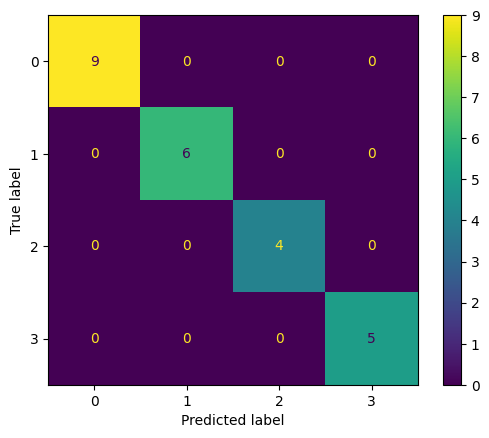

In [6]:
#Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=strategy.classes_)
disp.plot()

In [7]:
coef = strategy.coef_
inter = strategy.intercept_
for i in range(1,5):
  print(f"Decision boundry {i} is: {coef[i-1][0]}*Feature-1 + {coef[i-1][1]}*Feature-2 + {inter[i-1]}")

Decision boundry 1 is: -1.2450259285275673*Feature-1 + -1.3154057016915732*Feature-2 + -5.062310206336022
Decision boundry 2 is: 1.361065044766997*Feature-1 + -1.5342832036249163*Feature-2 + -5.38730437852126
Decision boundry 3 is: -1.247568027543448*Feature-1 + 1.2776245610174966*Feature-2 + -5.265717767898336
Decision boundry 4 is: 1.393555430001415*Feature-1 + 1.223371710759437*Feature-2 + -5.997407158804708


In [8]:
def get_line(c,m1,x1,m2):
  x2 = -(c+m1*x1)/m2
  return x2

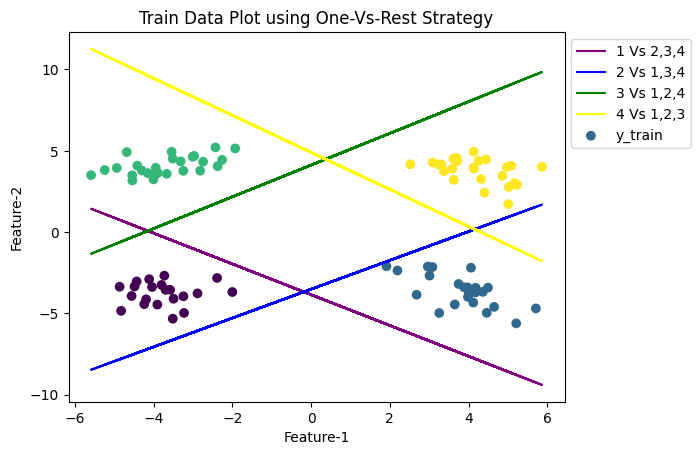

In [9]:
#Train Data Plot
colors=['purple','blue','green','yellow']
for i in range(1,5):
  bound = get_line(inter[i-1],coef[i-1][0],x_train["Feature-1"],coef[i-1][1])
  plt.plot(x_train["Feature-1"],bound,c=colors[i-1])
plt.scatter(x=x_train["Feature-1"],y=x_train["Feature-2"],c=y_train)
plt.legend(["1 Vs 2,3,4","2 Vs 1,3,4","3 Vs 1,2,4","4 Vs 1,2,3","y_train"],bbox_to_anchor=(1,1))
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title("Train Data Plot using One-Vs-Rest Strategy")
plt.show()

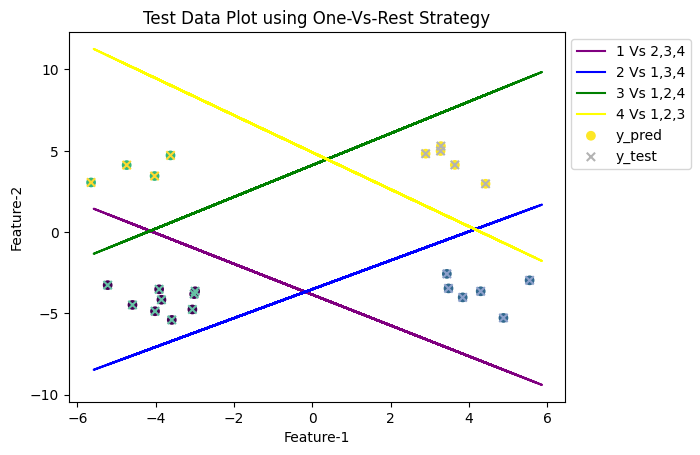

In [10]:
#Test Data Plot
colors=['purple','blue','green','yellow']
for i in range(1,5):
  bound = get_line(inter[i-1],coef[i-1][0],x_train["Feature-1"],coef[i-1][1])
  plt.plot(x_train["Feature-1"],bound,c=colors[i-1])
plt.scatter(x=x_test["Feature-1"],y=x_test["Feature-2"],c=y_pred,marker="o")
plt.scatter(x=x_test["Feature-1"],y=x_test["Feature-2"],c=y_test,marker="x",cmap="Set2")
plt.legend(["1 Vs 2,3,4","2 Vs 1,3,4","3 Vs 1,2,4","4 Vs 1,2,3","y_pred","y_test"],bbox_to_anchor=(1,1))
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title("Test Data Plot using One-Vs-Rest Strategy")
plt.show()

# **Multinomial Regression**

In [11]:
#model = LogisticRegression()
#strategy = OneVsRestClassifier(model)
strategy = LogisticRegression(multi_class="multinomial")
strategy.fit(x_train,y_train)
y_pred = strategy.predict(x_test)

In [12]:
#Performance Metrics
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[9 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]
Accuracy Score:
 1.0


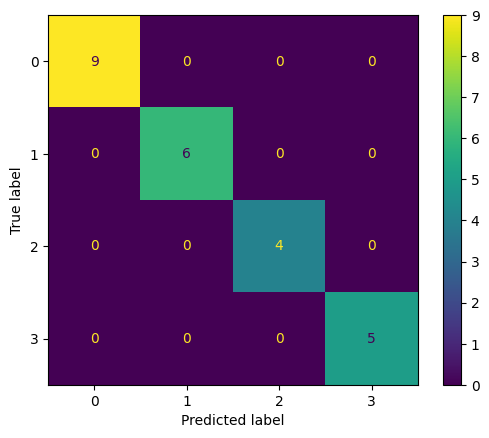

In [13]:
#Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=strategy.classes_)
disp.plot()

In [14]:
coef = strategy.coef_
inter = strategy.intercept_
for i in range(1,5):
  print(f"Decision boundry {i} is: {coef[i-1][0]}*Feature-1 + {coef[i-1][1]}*Feature-2 + {inter[i-1]}")

Decision boundry 1 is: -0.8271370275413772*Feature-1 + -0.7866130635477994*Feature-2 + 0.07020348778446224
Decision boundry 2 is: 0.6695831990889174*Feature-1 + -0.7435790737055435*Feature-2 + 0.3324093049646081
Decision boundry 3 is: -0.7235357257890747*Feature-1 + 0.7199685752719017*Feature-2 + 0.25969618317147725
Decision boundry 4 is: 0.8810895542415376*Feature-1 + 0.8102235619814401*Feature-2 + -0.662308975920552


In [15]:
def get_line(c,m1,x1,m2):
  x2 = -(c+m1*x1)/m2
  return x2

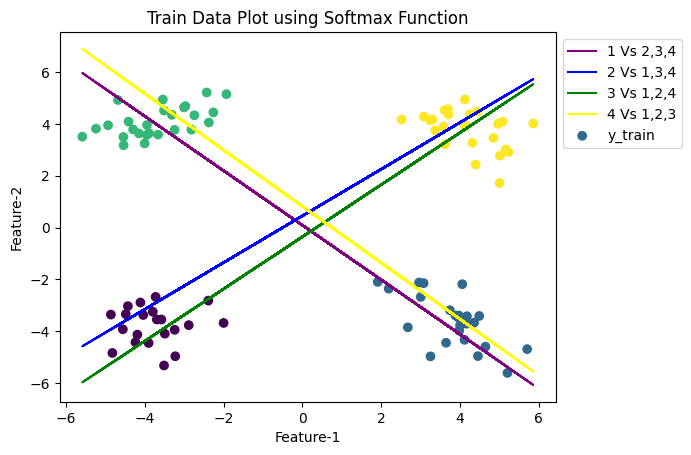

In [16]:
#Train Data Plot
colors=['purple','blue','green','yellow']
for i in range(1,5):
  bound = get_line(inter[i-1],coef[i-1][0],x_train["Feature-1"],coef[i-1][1])
  plt.plot(x_train["Feature-1"],bound,c=colors[i-1])
plt.scatter(x=x_train["Feature-1"],y=x_train["Feature-2"],c=y_train)
plt.legend(["1 Vs 2,3,4","2 Vs 1,3,4","3 Vs 1,2,4","4 Vs 1,2,3","y_train"],bbox_to_anchor=(1,1))
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title("Train Data Plot using Softmax Function")
plt.show()

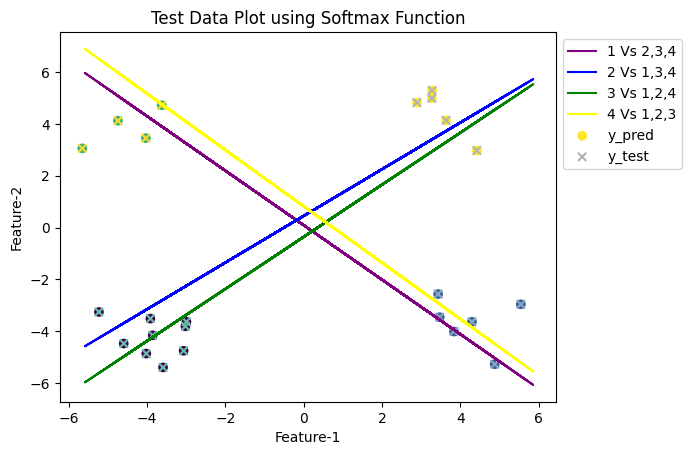

In [17]:
#Test Data Plot
colors=['purple','blue','green','yellow']
for i in range(1,5):
  bound = get_line(inter[i-1],coef[i-1][0],x_train["Feature-1"],coef[i-1][1])
  plt.plot(x_train["Feature-1"],bound,c=colors[i-1])
plt.scatter(x=x_test["Feature-1"],y=x_test["Feature-2"],c=y_pred,marker="o")
plt.scatter(x=x_test["Feature-1"],y=x_test["Feature-2"],c=y_test,marker="x",cmap="Set2")
plt.legend(["1 Vs 2,3,4","2 Vs 1,3,4","3 Vs 1,2,4","4 Vs 1,2,3","y_pred","y_test"],bbox_to_anchor=(1,1))
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title("Test Data Plot using Softmax Function")
plt.show()